In [ ]:
# x_test

/Users/sohanurrahman/Desktop/College/Research_2025/federated_learning


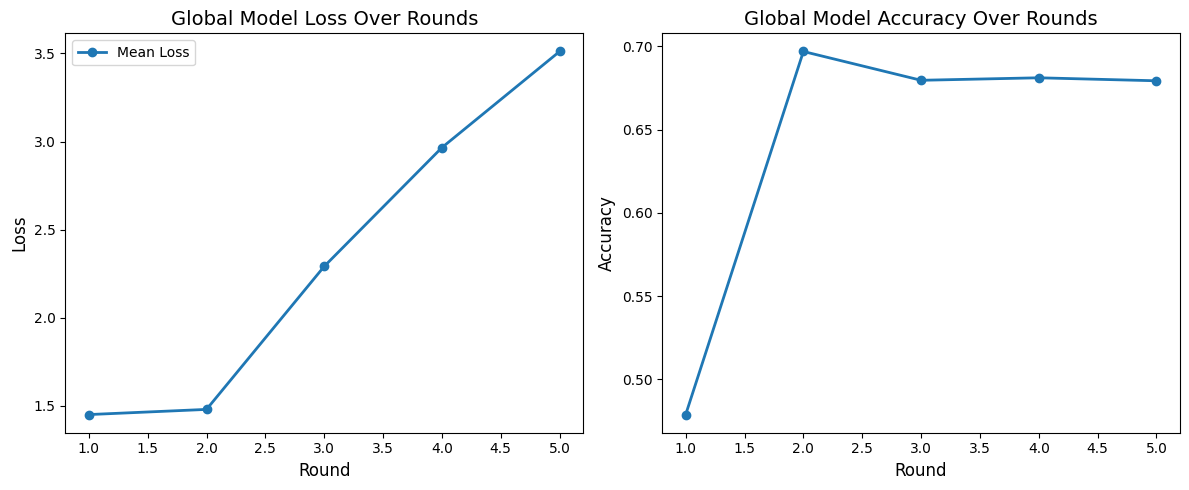

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os

print(os.getcwd())

data = f"/Users/sohanurrahman/Desktop/College/Research_2025/federated_learning/fl_server/client/server_metrics/server_metrics.json"

with open(data, 'r') as f:
    data = json.load(f)

mean_loss = [ m["mean_loss"] for _, m  in enumerate(data["global_metrics"])]
mean_accuracy = [ m["mean_accuracy"] for i, m  in enumerate(data["global_metrics"])]
rounds = [ m["round"] for i, m  in enumerate(data["global_metrics"])]


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rounds[:len(mean_loss)], mean_loss, 'o-', linewidth=2, label='Mean Loss')
plt.legend()
plt.title('Global Model Loss Over Rounds', fontsize=14)
plt.xlabel('Round', fontsize=12)
plt.ylabel('Loss', fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(rounds[:len(mean_accuracy)], mean_accuracy, 'o-', linewidth=2)
plt.title('Global Model Accuracy Over Rounds', fontsize=14)
plt.xlabel('Round', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.tight_layout()
plt.show()



# Test Model

In [1]:
import tensorflow as tf


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [45]:
# initial_learning_rate = 0.001
# decay_steps = 100
# decay_rate = 0.50
# learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps,
#     decay_rate,
#     staircase=True)

# optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)


# Define and compile the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=8)


Epoch 1/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.3660 - loss: 1.7354
Epoch 2/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.5451 - loss: 1.2931
Epoch 3/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.5868 - loss: 1.1837
Epoch 4/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6104 - loss: 1.1302
Epoch 5/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6264 - loss: 1.0710
Epoch 6/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6414 - loss: 1.0375
Epoch 7/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.6504 - loss: 1.0010
Epoch 8/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6657 - loss: 0.9672
Epoch 9/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6775 - loss: 0.9356
Epoch 10/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6841 - loss: 0.9111
Epoch 11/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6932 - loss: 0.8882
Epoch 12/50
6250/62

In [46]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 11, 11, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,512 (798.88 KB)

 Trainable params: 68,170 (266.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,342 (532.59 KB)

In [47]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6406 - loss: 1.3903


[1.4017757177352905, 0.6370999813079834]